In [2]:
 
# Basic stuff
import numpy as np
import pandas as pd
import seaborn as sns

# importing libraries for data visualisations
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [3]:
#importing data into variables
df_hr = pd.read_csv('/content/hr_final.csv')
df_hr.head(5)

,Unnamed: 0,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,...,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age_tier,distancehome_tier,JobRole_tier,MonthlyIncome_tier
0,0,51,0,2,2,6,2,1,0,1,...,0,3,3,3.0,4.0,2.0,3,3,4,5
1,1,31,1,1,1,10,1,1,0,1,...,4,2,4,3.0,2.0,4.0,1,3,1,3
2,2,32,0,1,1,17,4,4,1,4,...,3,3,3,2.0,2.0,1.0,1,2,1,5
3,3,38,0,0,1,2,5,1,1,3,...,5,2,3,4.0,4.0,3.0,1,4,4,4
4,4,32,0,2,1,10,1,3,1,1,...,4,3,3,4.0,1.0,3.0,1,3,1,1


In [4]:
df_hr.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)

Here is the descriptive summary of the cleaned datasets

In [5]:
df_hr.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4382.0,36.933364,9.137272,18.0,30.0,36.0,43.0,60.0
Attrition,4382.0,0.160885,0.367467,0.0,0.0,0.0,0.0,1.0
BusinessTravel,4382.0,1.607257,0.665635,0.0,1.0,2.0,2.0,2.0
Department,4382.0,1.260840,0.527461,0.0,1.0,1.0,2.0,2.0
DistanceFromHome,4382.0,9.198996,8.105396,1.0,2.0,7.0,14.0,29.0
Education,4382.0,2.912369,1.024728,1.0,2.0,3.0,4.0,5.0
EducationField,4382.0,2.247147,1.329810,0.0,1.0,2.0,3.0,5.0
Gender,4382.0,0.599270,0.490102,0.0,0.0,1.0,1.0,1.0
JobLevel,4382.0,2.063898,1.106115,1.0,1.0,2.0,3.0,5.0
JobRole,4382.0,4.459836,2.461038,0.0,2.0,5.0,7.0,8.0


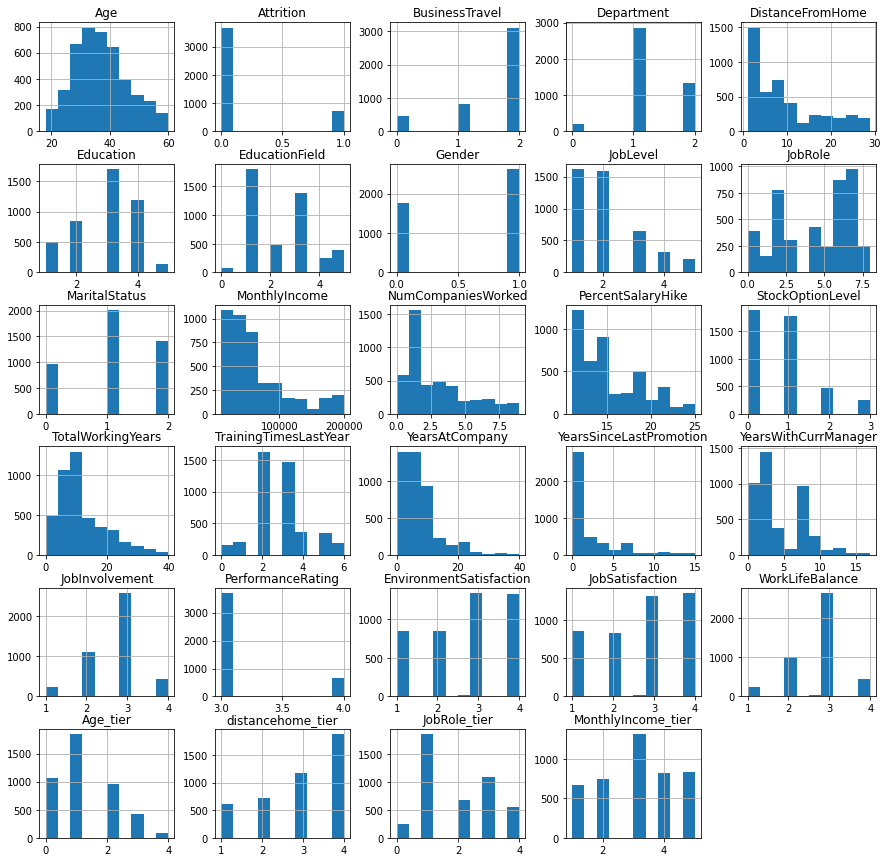

In [6]:
df_hr.hist(figsize=(15,15))
plt.show()

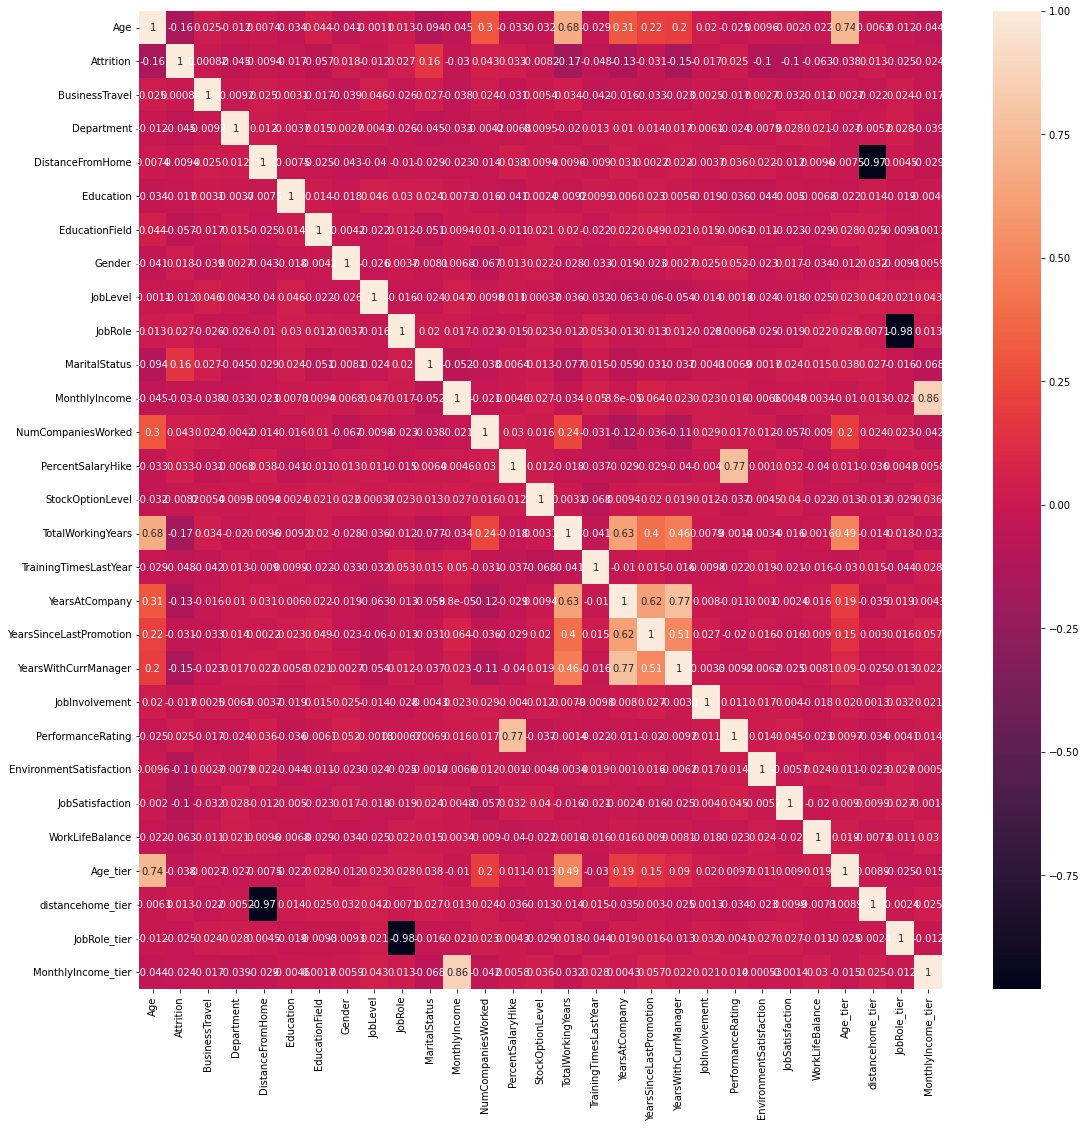

In [7]:
#let's check the correlation of data
plt.subplots(figsize = (18, 18))
sns.heatmap(df_hr.corr(), annot = True)

Here, *age* is highly related to all parameters and job level highly related to total working hours and also the mothly income

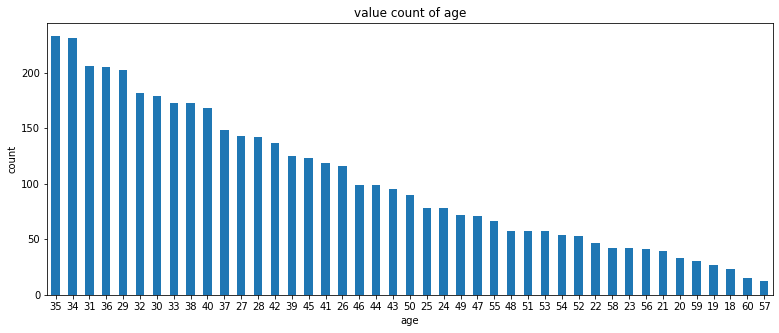

In [8]:
plt.figure(figsize=(13,5))
df_hr.Age.value_counts().plot(kind="bar")
plt.title("value count of age")
plt.xlabel("age")
plt.xticks(rotation=0)
plt.ylabel("count")
plt.show()

35 is the most common age

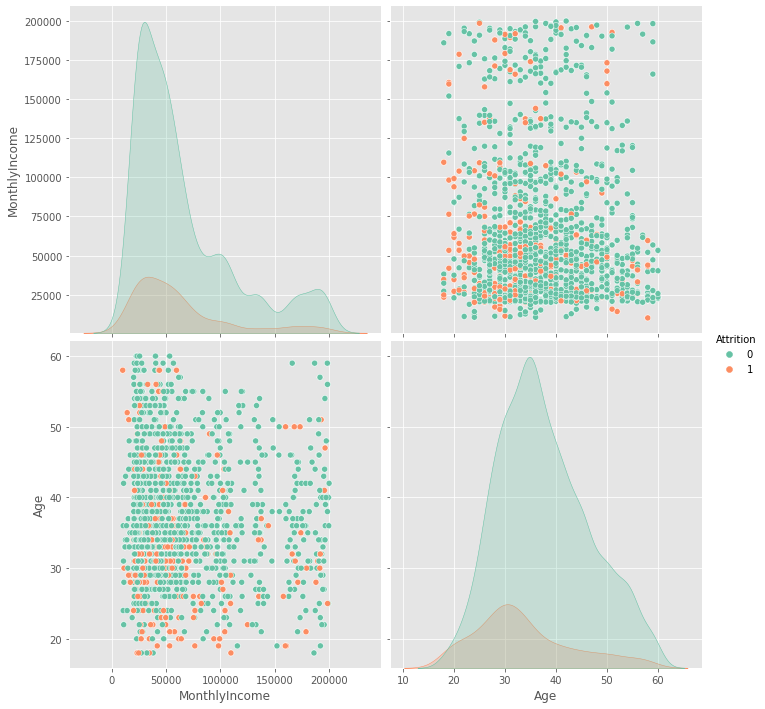

In [9]:
plt.style.use('ggplot')
g = sns.pairplot(df_hr, vars=["MonthlyIncome", "Age"],hue="Attrition", palette = 'Set2' ,height=5)

Younger employees tend more to attrition as they are not attached to a stable life and have much more opportunitioes, unlike the older employees

<Figure size 288x144 with 0 Axes>

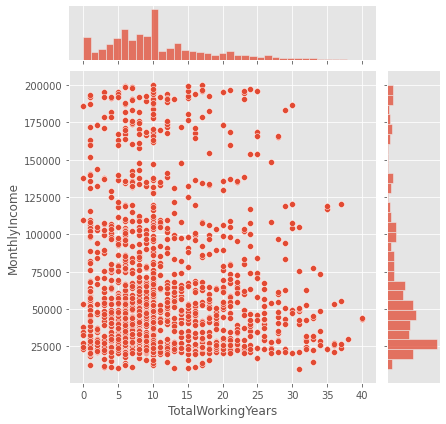

In [10]:
plt.figure(figsize=(4,2))
plt.style.use('ggplot')
sns.jointplot(x='TotalWorkingYears', y='MonthlyIncome', data=df_hr)

We can see the more experinced employees have higher income.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Job Role')

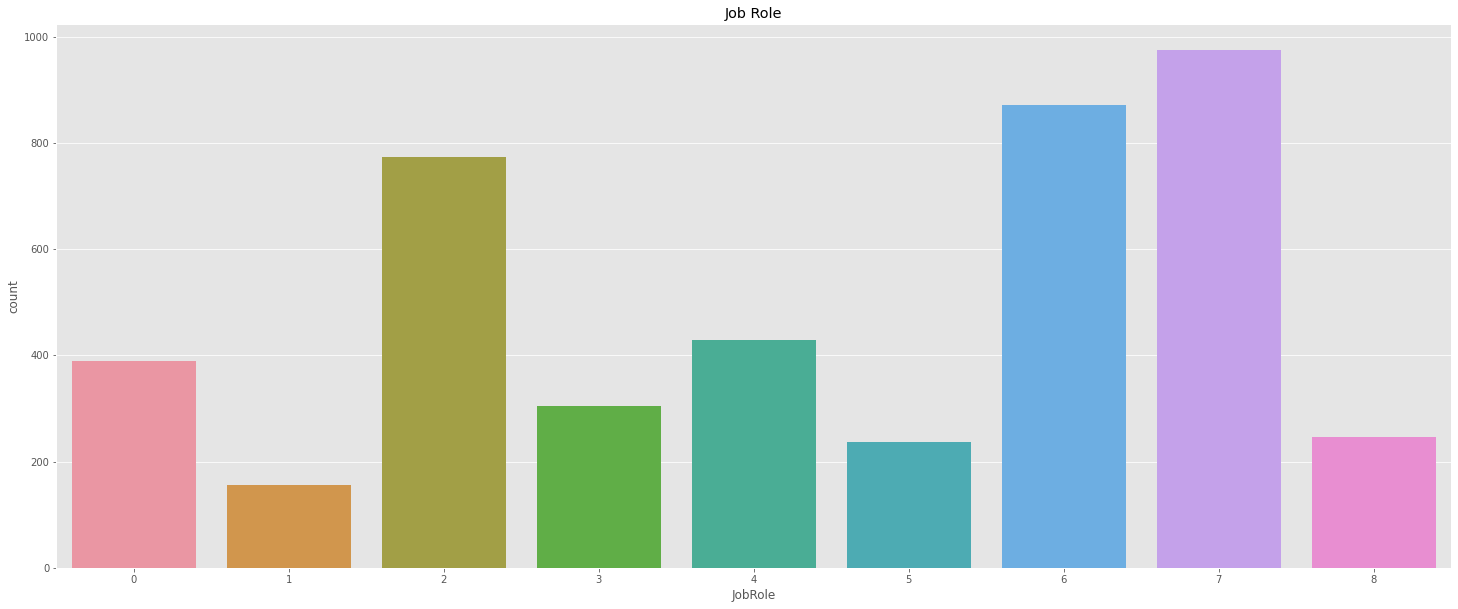

In [12]:
sns.countplot(df_hr['JobRole'])
fig = plt.gcf()
fig.set_size_inches(25,10)
plt.title('Job Role')

The most common Job role is sales executive.

Text(0.5, 1.0, 'Education Field Counts')

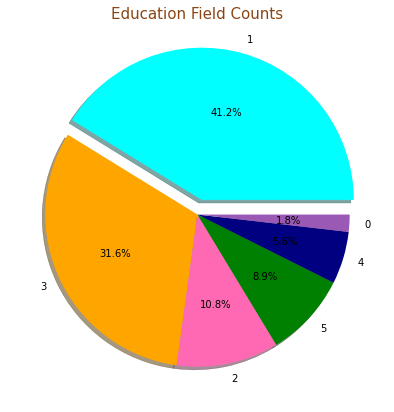

In [14]:
labels=df_hr.EducationField.value_counts().index
colors=["cyan","orange","hotpink","green","navy","#9b59b6"]
sizes=df_hr.EducationField.value_counts().values
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=labels,colors=colors,autopct="%1.1f%%", explode=[0.1,0,0,0,0,0], shadow = True 
)
plt.title("Education Field Counts",color="saddlebrown",fontsize=15)

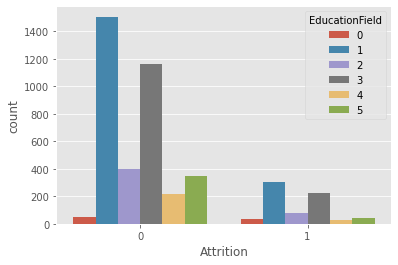

In [18]:
## Is the education level related to attrition?

sns.countplot(x='Attrition', hue= 'EducationField', data = df_hr)
plt.show()

We can see that employees with life science and medical degrees tend more for attrition, it could be because the higher degree level are not very attached to companies if they encountered the slightest discomfort in the workplace.

What is the marital status for the employees?

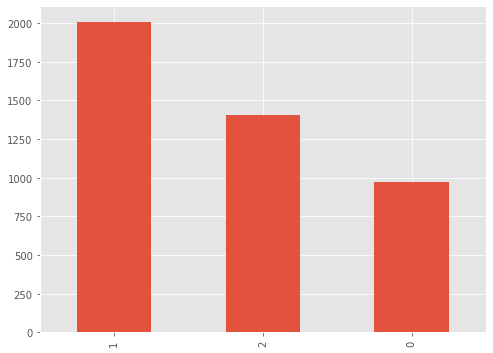

In [19]:
# number of married and unmarried employees
plt.figure(figsize=(8,6))
df_hr.MaritalStatus.value_counts().plot(kind='bar',alpha=.95)
plt.show()

Relationship between marital status and attrition

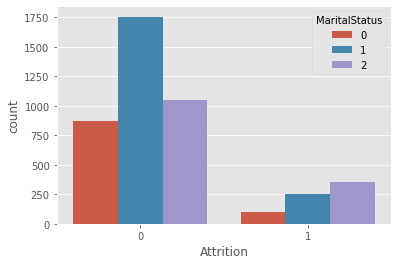

In [20]:
sns.countplot(x='Attrition', hue= 'MaritalStatus', data = df_hr)
plt.show()

We can clearly see that the Singles are more likely to attrition as they don't care as much for a stable static life as the married employees.

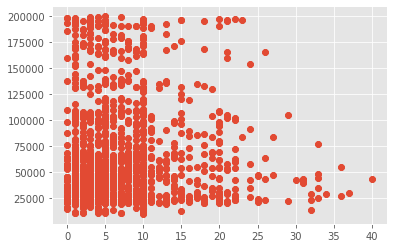

In [21]:
plt.scatter(df_hr["YearsAtCompany"], df_hr["MonthlyIncome"])

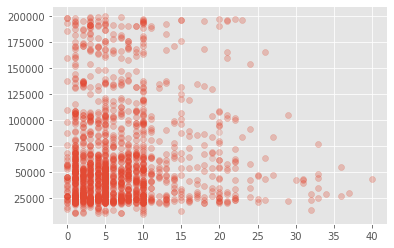

In [22]:
plt.scatter(df_hr["YearsAtCompany"], df_hr["MonthlyIncome"] , alpha=0.1)

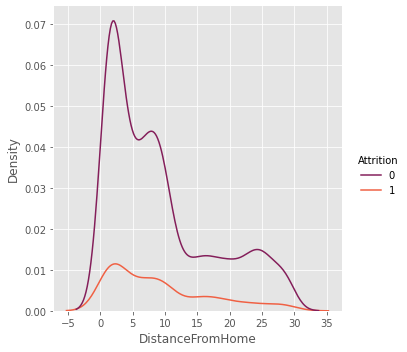

In [23]:
sns.displot(data = df_hr, x = 'DistanceFromHome', hue = 'Attrition', kind="kde",palette='rocket')

At the smaller distances the possiblity is too small for the employee to get attrited and it is the same at the larger distances, so we can say that the distance from home has nothing to do with the attrition

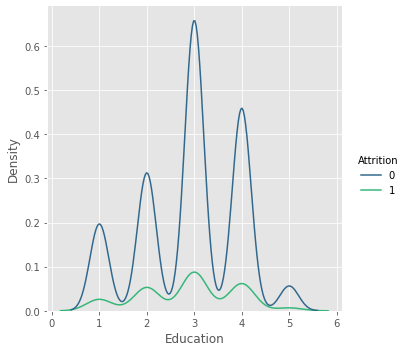

In [24]:
sns.displot(data = df_hr, x = 'Education', hue = 'Attrition', kind="kde",palette='viridis')

Education isn't related to the attrition.

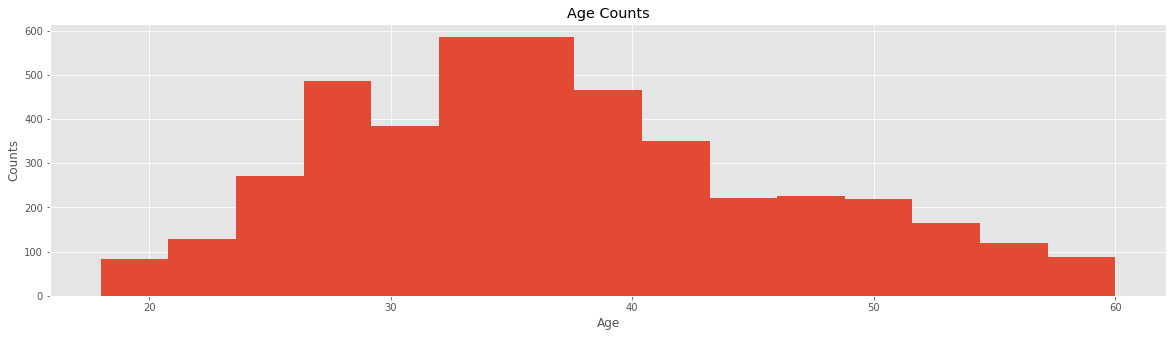

In [25]:
plt.figure(figsize=(20,5))
plt.hist(df_hr.Age,bins=15)
plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Age Counts")
plt.show()

We can see that the most common age of employees is around 30 - 40

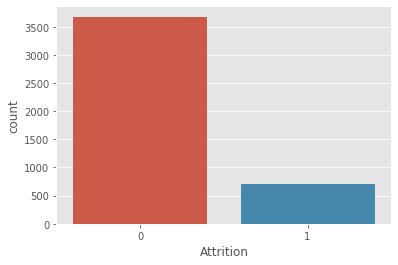

In [26]:
sns.countplot(x='Attrition', data = df_hr)
plt.show()

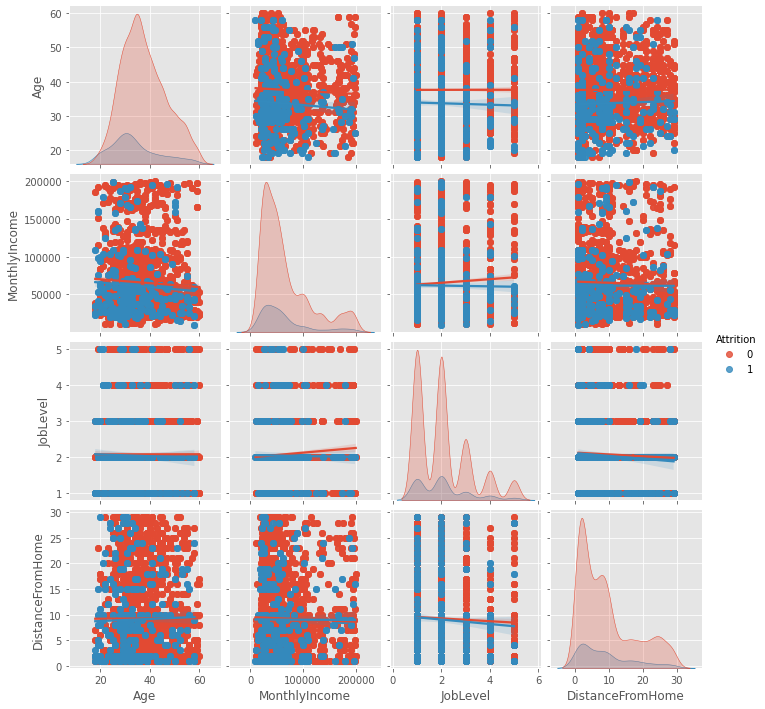

In [27]:
cont_col= ['Attrition','Age','MonthlyIncome', 'JobLevel','DistanceFromHome']
sns.pairplot(df_hr[cont_col],  kind="reg", diag_kind = "kde"  , hue = 'Attrition' )
plt.show()


Factorplots are plots between one continuous, one categorical conditioned by another one or two categorical variables

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


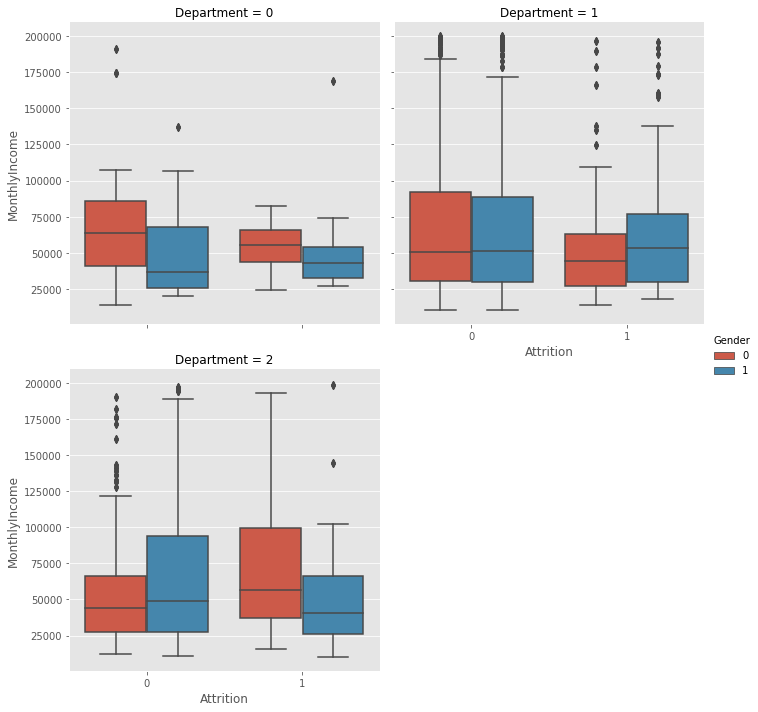

In [28]:
sns.factorplot(x =   'Attrition',         # Categorical
               y =   'MonthlyIncome',      # Continuous
               hue = 'Gender',             # Categorical
               col = 'Department',
               col_wrap=2,                 # Wrap facet after two axes
               kind = 'box',
               data = df_hr)
plt.show()